## CS530 Data Mining Homework 4 part 2

#### Question 2 (4 points)

a. Run k-means clustering algorithm using Scikit-learn on the Iris dataset. Create silhouette plots for different k values and find the best k.

For n_clusters = 2 The average silhouette_score is : 0.681046169211746
For n_clusters = 3 The average silhouette_score is : 0.5528190123564091
For n_clusters = 4 The average silhouette_score is : 0.4980505049972867
For n_clusters = 5 The average silhouette_score is : 0.4887488870931048
For n_clusters = 6 The average silhouette_score is : 0.3678464984712235


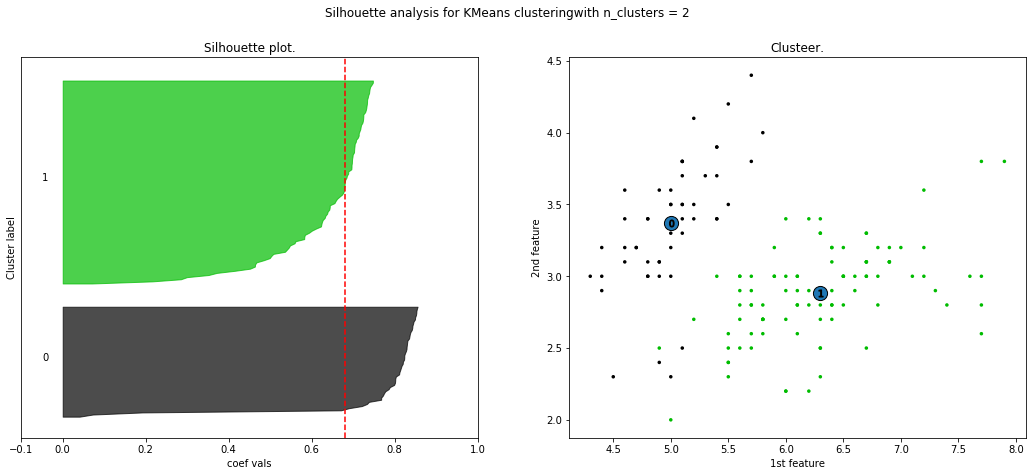

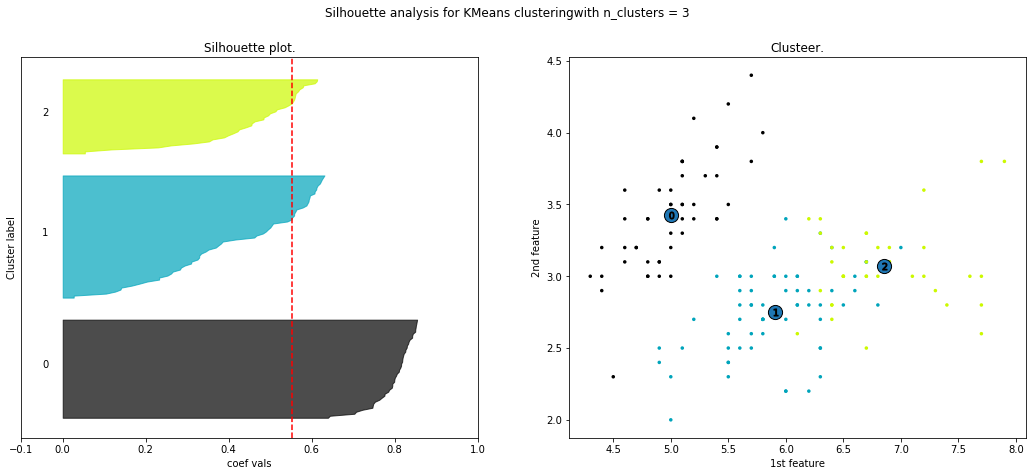

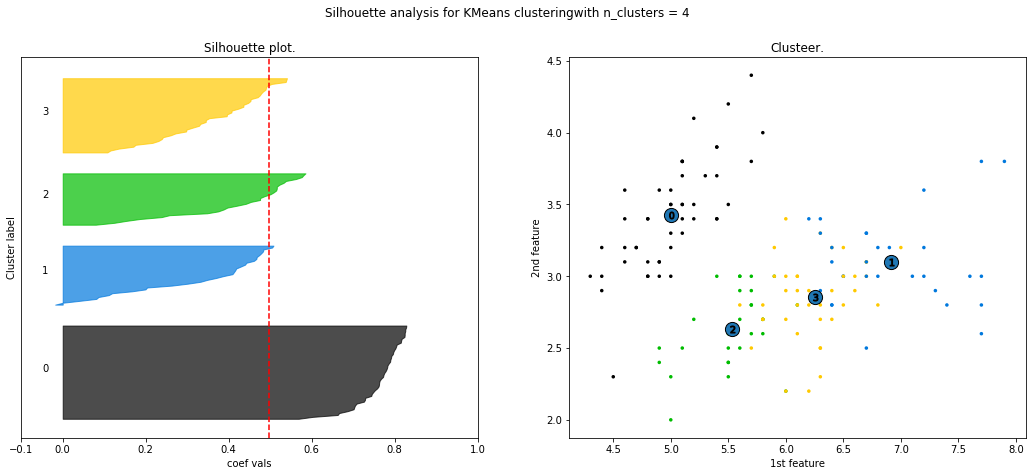

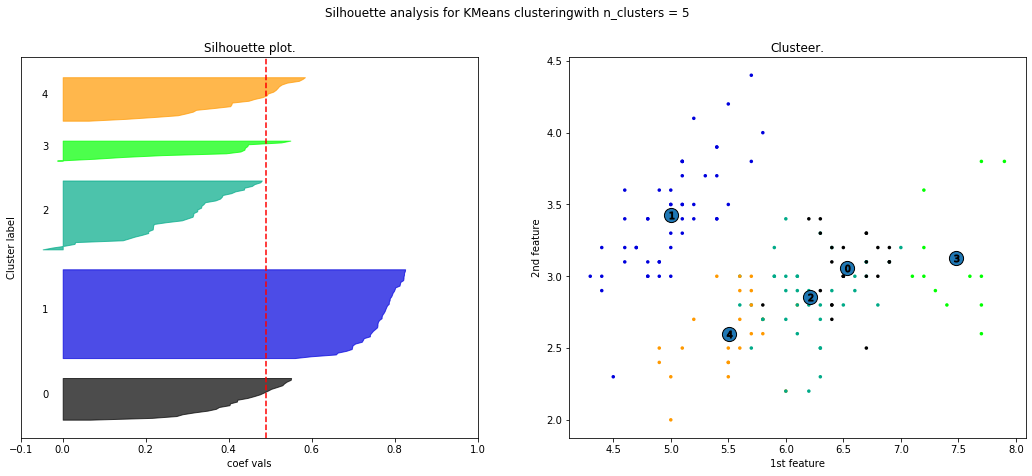

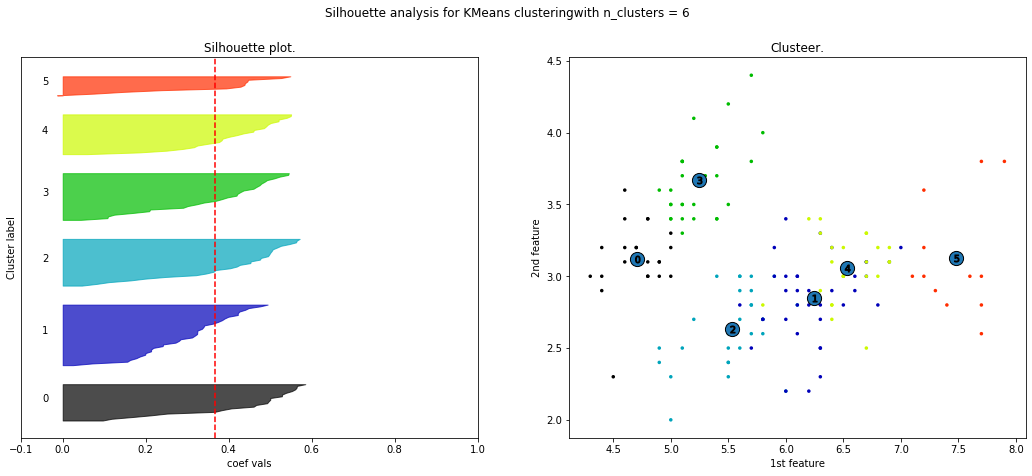

"\n\nThe best k would either be 3 or 6 as their silhouettes are above the averagee silhouette scores and compared to the \nother k's, they don't have that large of fluctuations in size.\n\nK = 2 also have both silhouettes above average, but the sizes of the silhouttes have \nlarge fluctuations- one is much larger than the other.\nAll of the k = 4 and 5 have thin silhouettes and values under either below or just bordering the average silhoute score.\n\nIt is hard to judge if 3 or 6 is better, but I might say that 3 is better because they have higher silhoute\nand the size does not fluctuate to much.\n\n"

In [8]:
## Your code goes here
#from notebook on canvas and 
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

iris = load_iris()
X = iris.data

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    yLower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        
        yUpper = yLower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(yLower, yUpper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, yLower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        yLower = yUpper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot.")
    ax1.set_xlabel("coef vals")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
     
    # 2nd Plot showing the clusters
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=50, lw=0, alpha=1,
                c=colors, edgecolor='k')
    
    ax2.set_title("Clusteer.")
    ax2.set_xlabel("1st feature")
    ax2.set_ylabel("2nd feature")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    plt.suptitle(("Silhouette analysis for KMeans clustering"
                  "with n_clusters = %d" % n_clusters))

plt.show()

'''

The best k would either be 3 or 6 as their silhouettes are above the averagee silhouette scores and compared to the 
other k's, they don't have that large of fluctuations in size.

K = 2 also have both silhouettes above average, but the sizes of the silhouttes have 
large fluctuations- one is much larger than the other.
All of the k = 4 and 5 have thin silhouettes and values under either below or just bordering the average silhoute score.

It is hard to judge if 3 or 6 is better, but I might say that 3 is better because they have higher silhoute
and the size does not fluctuate to much.

'''

b. Compare your clustering results with the actual labels in the Iris dataset. Is there a difference? Explain what might be the cause of the difference.

In [2]:
## Your code goes here
import collections, numpy
from collections import Counter 


import pandas as pd 
#choosing k = 3 from part a
clusterer = KMeans(n_clusters=3, random_state=120)
cluster_labels = clusterer.fit_predict(X)

data = {'Actual':iris.target, 'Clusters':cluster_labels} 

df = pd.DataFrame(data)
pd.set_option('display.max_rows', df.shape[0]+1)
print(df)

print(collections.Counter(iris.target))
print(collections.Counter(cluster_labels))

'''

There is a difference. 
Initially the clusters line up perfeectly, both the actual data and the clusterin results, 
have the same cluster labels. The first cluster aligns perfectly for the actual and generated results. 
Then, wheen you move the next cluster label, they are similar, but the clustering results data has 
a little bit from the third cluster mixed in, and then more as you move to the third cluster. 

One of the clusters for both the actual and generated kmeans results is of the same size, but the other two in the 
clustering results are slighly larger and smaller. The actual had 50 in each cluster while the generated one had 62, 50, and 38.

One cause of the diffence might be that the in order start any kmeans we randomize the initial points in our clusters data.
Thus, becuase the initial points are ranndom we will get different centroids, so the answers will be different but similar.
'''

     Actual  Clusters
0         0         1
1         0         1
2         0         1
3         0         1
4         0         1
5         0         1
6         0         1
7         0         1
8         0         1
9         0         1
10        0         1
11        0         1
12        0         1
13        0         1
14        0         1
15        0         1
16        0         1
17        0         1
18        0         1
19        0         1
20        0         1
21        0         1
22        0         1
23        0         1
24        0         1
25        0         1
26        0         1
27        0         1
28        0         1
29        0         1
30        0         1
31        0         1
32        0         1
33        0         1
34        0         1
35        0         1
36        0         1
37        0         1
38        0         1
39        0         1
40        0         1
41        0         1
42        0         1
43        0         1
44        

'\n\nThere is a difference. \nInitially the clusters line up perfeectly, both the actual data and the clusterin results, \nhave the same cluster labels. The first cluster aligns perfectly for the actual and generated results. \nThen, wheen you move the next cluster label, they are similar, but the clustering results data has \na little bit from the third cluster mixed in, and then more as you move to the third cluster. \n\nOne of the clusters for both the actual and generated kmeans results is of the same size, but the other two in the \nclustering results are slighly larger and smaller. The actual had 50 in each cluster while the generated one had 62, 50, and 38.\n\nOne cause of the diffence might be that the in order start any kmeans we randomize the initial points in our clusters data.\nThus, becuase the initial points are ranndom we will get different centroids, so the answers will be different but similar.\n'

#### Question 3 (3 points)

a. Look at the hierarchical clustering documentation for [scipy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). Perform hierachical clustering on the Iris dataset using single, complete, average and centroid linkage. Plot their associated dendrogram.

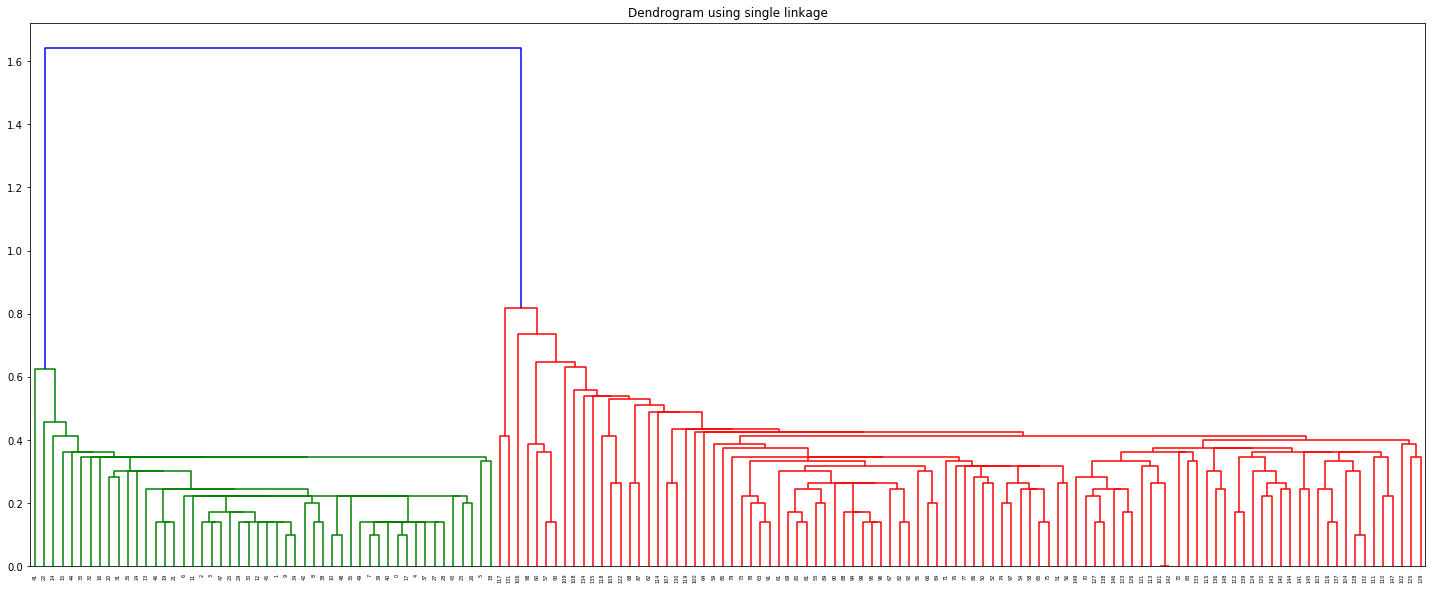

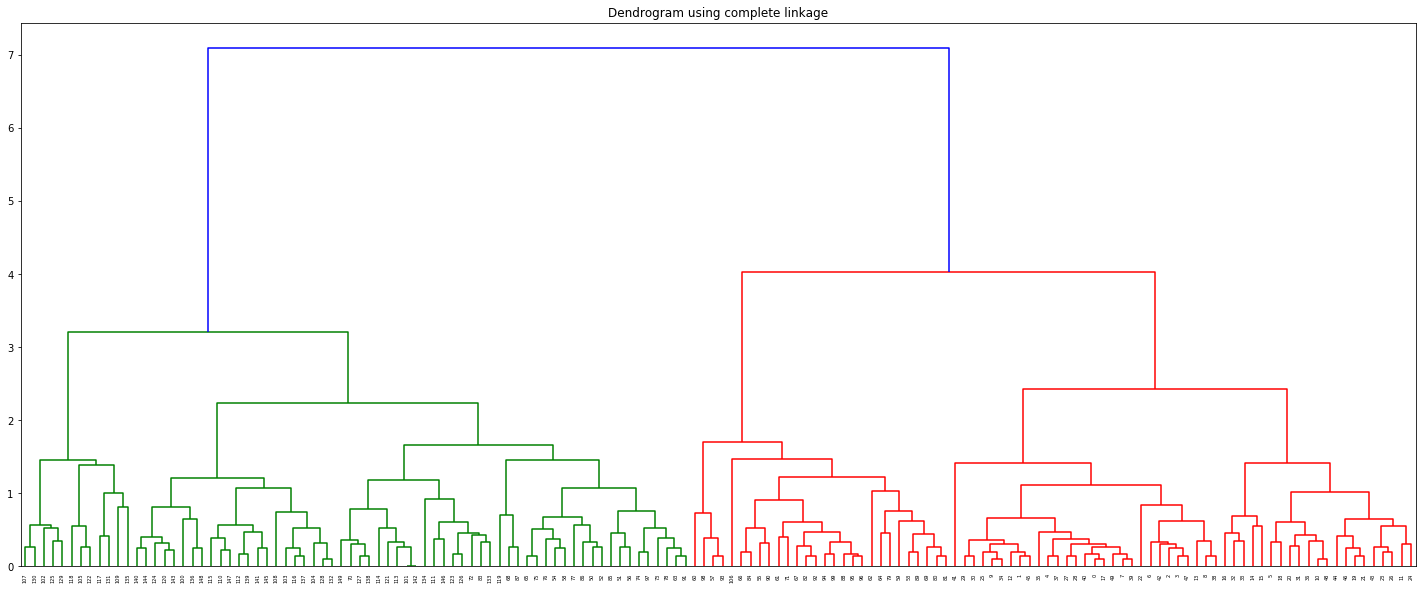

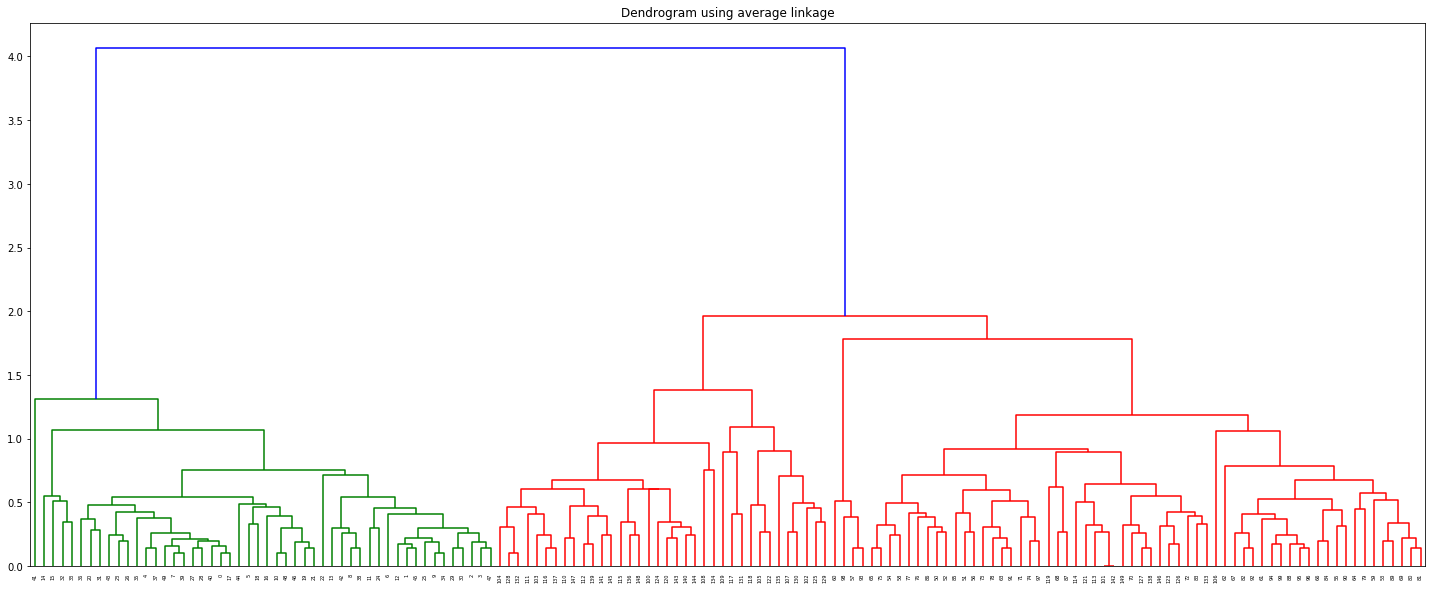

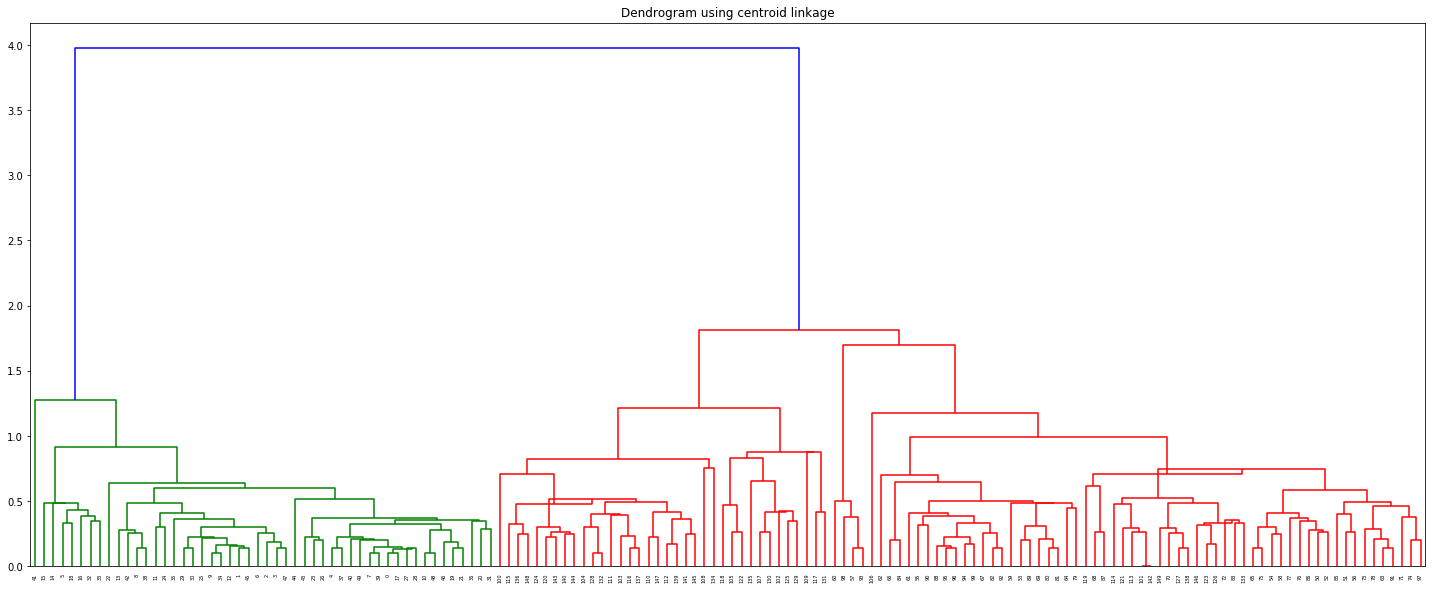

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster, single
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import complete, fcluster

n_linkage = ['single','complete','average', 'centroid']

for n in n_linkage:
    Z = linkage(X, n)
    fig = plt.figure(figsize =(25, 10))
    plt.title('Dendrogram using ' + n + ' linkage')
    dn = dendrogram(Z)
    plt.show()

b. Look at the dendrograms more closely and explain the difference between each linkage method.

In [5]:
'''
1) single linkage: the dissimilarites are determined by the shortest distance betweeen any element 
in one clusteer vs an element in another cluster

2) averge: dissimilarities determined by the average distance betweeen any element in one cluster 
and any element in another cluster

3) complete: dissimilaries determinded by the farthest distance betweennn an element in once 
cluster and an element in another cluster.

4) centroid: dissimilarities are determinneed by the distance between the centroid of a cluster and a centroid of another cluster.
'''

'\n1) single linkage: the dissimilarites are determined by the shortest distance betweeen any element \nin one clusteer vs an element in another cluster\n\n2) averge: dissimilarities determined by the average distance betweeen any element in one cluster \nand any element in another cluster\n\n3) complete: dissimilaries determinded by the farthest distance betweennn an element in once \ncluster and an element in another cluster.\n\n4) centroid: dissimilarities are determinneed by the distance between the centroid of a cluster and a centroid of another cluster.\n'

c. Choose your linkage method and the number of clusters you would like to keep. Create clustering labels for the Iris dataset and compare with the actual labels. Explain the difference.

In [6]:
# Your code goes here
from sklearn.cluster import AgglomerativeClustering

chosen_clustering = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)

data = {'Actual':iris.target, 'Clusters':chosen_clustering.labels_} 
df = pd.DataFrame(data)
pd.set_option('display.max_rows', df.shape[0]+1)

print(collections.Counter(iris.target))
print(collections.Counter(chosen_clustering.labels_))

print(df)


Counter({0: 50, 1: 50, 2: 50})
Counter({0: 64, 1: 50, 2: 36})
     Actual  Clusters
0         0         1
1         0         1
2         0         1
3         0         1
4         0         1
5         0         1
6         0         1
7         0         1
8         0         1
9         0         1
10        0         1
11        0         1
12        0         1
13        0         1
14        0         1
15        0         1
16        0         1
17        0         1
18        0         1
19        0         1
20        0         1
21        0         1
22        0         1
23        0         1
24        0         1
25        0         1
26        0         1
27        0         1
28        0         1
29        0         1
30        0         1
31        0         1
32        0         1
33        0         1
34        0         1
35        0         1
36        0         1
37        0         1
38        0         1
39        0         1
40        0         1
41        0   

In [7]:
'''

Initially the clusters line up perfeectly, both the actual data and the clusterin results, 
have the same cluster labels. The same happens at the next label- they have the same amount. 
But when you get to the third label of actual, we see that two labels start to mix in with each other
for the clustering results. This means that the clutsering i chose has one label with the same size 
as the actual, and one with slighlty more and one with less.
Actual has 50 in each cluster while generated has 64, 50, and 36.


'''

'\n\nInitially the clusters line up perfeectly, both the actual data and the clusterin results, \nhave the same cluster labels. The same happens at the next label- they have the same amount. \nBut when you get to the third label of actual, we see that two labels start to mix in with each other\nfor the clustering results. This means that the clutsering i chose has one label with the same size \nas the actual, and one with slighlty more and one with less.\nActual has 50 in each cluster while generated has 64, 50, and 36.\n\n\n'